In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions

In [87]:
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

In [88]:
# seed
random_state = 42  # For reproducibility

In [89]:
# loading the data
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/boston_clean.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [90]:
# check the data type 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [91]:
# drop column B
df.drop("B", axis=1, inplace=True)

In [92]:
# check for isnull
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
price      0
dtype: int64

In [93]:
# convert the CHAS to category data 
df['CHAS']= df['CHAS'].astype('category')

In [94]:
# check the info of the category data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  LSTAT    506 non-null    float64 
 12  price    506 non-null    float64 
dtypes: category(1), float64(12)
memory usage: 48.2 KB


### converting CHAS

In [95]:
# convert the CHAS to dummny dataframe 
df['CHAS'] = pd.get_dummies(df['CHAS'], drop_first=True, dtype=int)

In [96]:
# view the effect of the change 
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Converting RAD

In [97]:
# sort the RAD columns 
df.RAD.value_counts().sort_index()

RAD
1.0      20
2.0      24
3.0      38
4.0     110
5.0     115
6.0      26
7.0      17
8.0      24
24.0    132
Name: count, dtype: int64

In [98]:
# import the Ordinal encoder 
from sklearn.preprocessing import OrdinalEncoder


# Initialize and apply OrdinalEncoder
encoder = OrdinalEncoder()

In [99]:
# convert the RAD to ordinal column
df['RAD'] = encoder.fit_transform(df[['RAD']])

In [100]:
# check the impact of the code 
df.RAD.value_counts().sort_index()

RAD
0.0     20
1.0     24
2.0     38
3.0    110
4.0    115
5.0     26
6.0     17
7.0     24
8.0    132
Name: count, dtype: int64

### Using the OneHotEncoder Method 

In [101]:
# Create a copy of the original dataframe for one-hot encoding
df_ohe = df.copy()

### using onehotencoder: CHAS

In [102]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

In [103]:
df_ohe['CHAS'] = encoder.fit_transform(df_ohe[['CHAS']])

In [104]:
df_ohe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,0.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,0.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,0.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,0.0,273.0,21.0,6.48,22.0


In [105]:
encoder.categories_

[array([0, 1])]

In [106]:
encoder.get_feature_names_out()

array(['CHAS_1'], dtype=object)

### using Onehotencoder: RAD

In [107]:
ohe = OneHotEncoder(drop='first')
RAD = ohe.fit_transform(df_ohe[['RAD']])


In [108]:
ohe.categories_

[array([0., 1., 2., 3., 4., 5., 6., 7., 8.])]

In [109]:
ohe.get_feature_names_out()

array(['RAD_1.0', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0', 'RAD_6.0',
       'RAD_7.0', 'RAD_8.0'], dtype=object)

In [111]:
# Convert to DataFrame with column names
encoded_df = pd.DataFrame(RAD.toarray(), columns=ohe.get_feature_names_out(['RAD']))

In [112]:
encoded_df

,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Create a copy of the original dataframe
df_transformed = df.copy()

# Define transformers
categorical_features = ['CHAS', 'RAD']
numeric_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('num', 'passthrough', numeric_features)
    ],
    remainder='drop'  # Drop the target variable 'price'
)

# Apply the transformations
X_transformed = preprocessor.fit_transform(df_transformed)

# Get feature names
ohe_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features)
feature_names = list(ohe_feature_names) + numeric_features

# Create a new DataFrame with transformed data
df_preprocessed = pd.DataFrame(X_transformed, columns=feature_names)

# Add the target variable back
df_preprocessed['price'] = df['price']

# Display the first few rows
df_preprocessed.head()

,CHAS_1,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2


### Removing outliers

In [114]:
df.shape

(506, 13)

In [115]:
numeric = df.select_dtypes(include=['int64', 'float64'])
category = df.select_dtypes(exclude=['int64', 'float64'])

In [116]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  price    506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


In [117]:
from scipy import stats

In [125]:
# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(numeric))


# Find outliers where absolute z-score is greater than 3
outliers = (z_scores > 3)

In [126]:
outliers

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [127]:
df = numeric[outliers]

In [128]:
df.shape

(75, 13)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 55 to 427
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     75 non-null     float64
 1   ZN       75 non-null     float64
 2   INDUS    75 non-null     float64
 3   CHAS     75 non-null     int64  
 4   NOX      75 non-null     float64
 5   RM       75 non-null     float64
 6   AGE      75 non-null     float64
 7   DIS      75 non-null     float64
 8   RAD      75 non-null     float64
 9   TAX      75 non-null     float64
 10  PTRATIO  75 non-null     float64
 11  LSTAT    75 non-null     float64
 12  price    75 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 8.2 KB


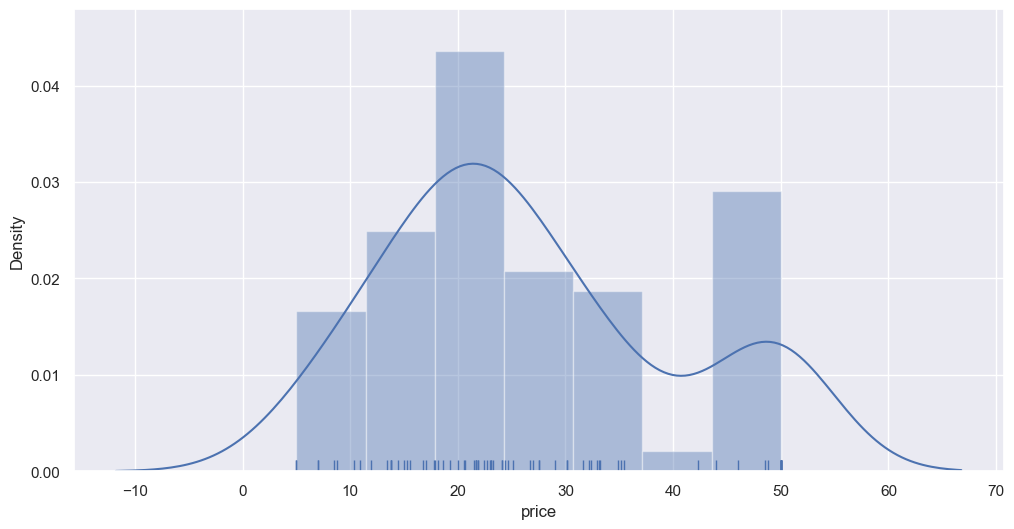

In [130]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'], rug=True)
plt.show()

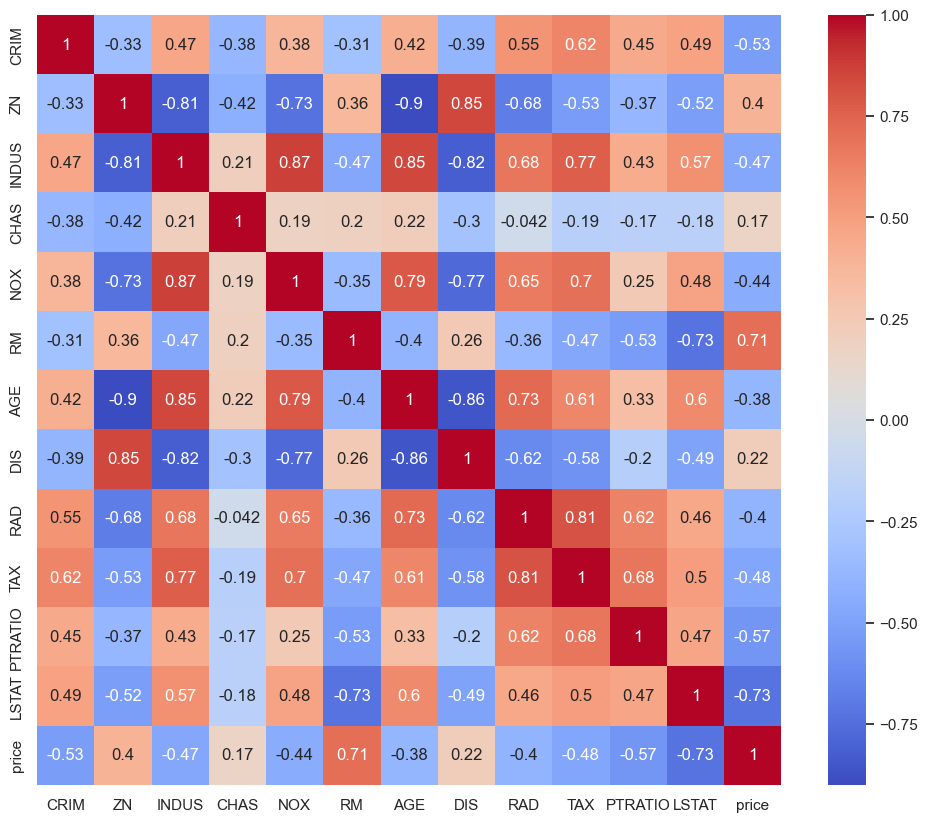

In [131]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

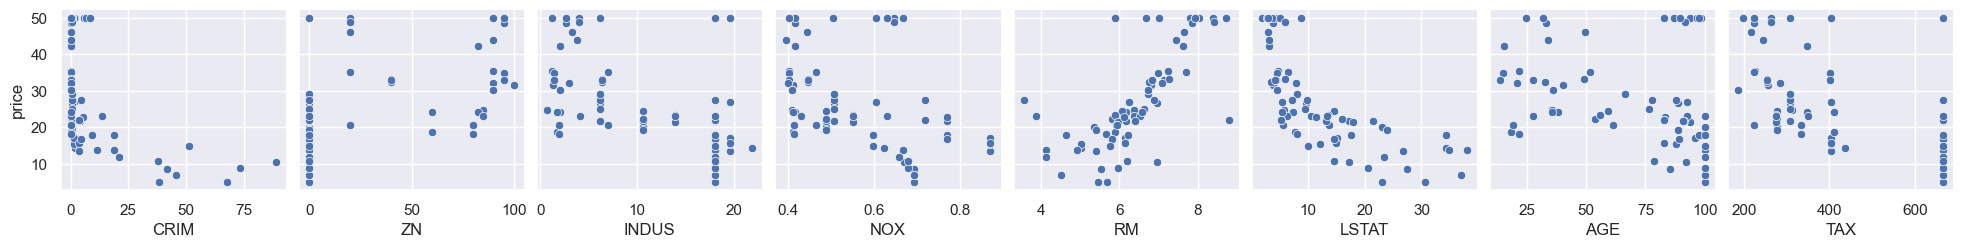

In [132]:
sns.pairplot(data=df, y_vars= ['price'], x_vars= ['CRIM','ZN','INDUS','NOX','RM','LSTAT', 'AGE', 'TAX'])
plt.show()